<h1> FUNCIONES DE DISTRIBUCIONES INVERSAS </h1>


A continuación se generan funciones de probabilidad basándose en funciones de distribución acumuladas inversas.
Usando vectores con valores generados de manera aleatoria aplicamos funciones de distribución inversas con el fin de obtener valores de probabilidad.

Importamos lo que necesitaremos.

In [1]:
import numpy as np                  # Cargamos numpy como el alias np
import matplotlib.pyplot as plt     # Crgagamos matplotlib.pyplot como el alias plt
%matplotlib inline

Declaramos la función que nos devolverá n valores pseudo-aleatorios, donde n es la cantidad de valores que le pediremos. Para esta función usamos los constantes para borland c/c++.

In [2]:
def aleaN(n):
    semilla = 20
    #Valores Borland C/C++
    a=22695477
    b=1
    m=2**32
    uVector = []
    #uVector.append( semilla / float(m) )
    for i in range(0,n):
    	rta = ( (a*semilla) + b ) % m
    	semilla = rta
    	u = rta / float(m)
    	uVector.append(u)
    #print uVector
    return uVector

Ahora bien, las funciones correspondientes:

<h2> Función de Distribución Exponencial </h2>

Función de Densidad:

\begin{equation*}
f(x) = P(x) = \left \{ \begin{matrix} \lambda e^{-\lambda x} & \mbox{para } x \geq \mbox{0}
\\ 0 & \mbox{ en caso contrario}\end{matrix}\right. 
\end{equation*}

Donde $\lambda > 0 $

Función de Distribución Acumulada:

\begin{equation*}
F(x) = P(X \leq x) = \left \{ \begin{matrix} 0 & \mbox{para } x < \mbox{0}
\\ 1-e^{-\lambda x} & \mbox{para } x \geq \mbox{0}\end{matrix}\right. 
\end{equation*}

Función de Distribución Exponencial Acumulada Inversa:

\begin{equation*}
F^{-1}(p) = \frac{-\ln(1-p)}{\lambda}
\end{equation*}

In [228]:
def funInverExp(u,y):
    x = []
    e = []
    ex = []
    n = len(u)
    #y = 4
    for i in range(0,n):
        x.append(-(np.log(1-u[i]))/float(y))
    maxX = max(x)
    ex = np.arange(0,maxX,maxX/float(10000)) 
    for j in ex:
        #ex.append(2*(float(j)/1000))
        e.append(y*np.exp(-y*j))
        
    print "Función Sin Normalizar."
    plt.hist(x)
    plt.show() 
    
    print "Función Normalizada junto con la función de densidad exponencial."
    plt.hist(x, normed = True)
    plt.plot(ex,e)
    plt.show()

Función Sin Normalizar.


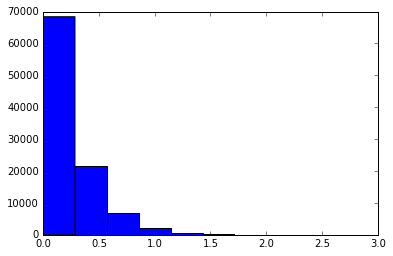

Función Normalizada junto con la función de densidad exponencial.


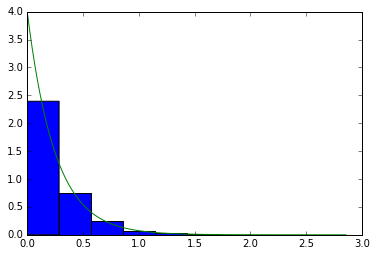

In [229]:
funInverExp(aleaN(100000),4)  #Los parámetros son cantidad de valores aleatorios generados y el lambda de la func. Expo.

 <h2> Función de Distribución Logística </h2>

Función de Densidad:

\begin{equation*}
f(x;\mu,s) = P(x;\mu,s) = \frac{e^{-(x-\mu)/s}}{s(1+e^{-(x-\mu)/s})^2} = \frac{1}{4s} \sech^2(\frac{x-\mu}{2s}).  
\end{equation*}

Donde $\mu$ es $\Re$ (Real) y $s > 0$ es $\Re$ (Real).

Función de Distribución Acumulada:

\begin{equation*}
F(x;\mu,s) = P(X \leq x;\mu,s) = \frac{1}{1+e^{-(x-\mu)/s}} = \frac{1}{2} + \frac{1}{2} \tanh(\frac{x-\mu}{2s}).  
\end{equation*}

Donde $\mu$ es $\Re$ (Real) y $s > 0$ es $\Re$ (Real).

Función de Distribución Acumulada Inversa:

\begin{equation*}
F^{-1}(p;\mu,s) = \mu + s\ln(\frac{p}{1-p}).
\end{equation*}

In [230]:
def funInverLog(u,mu,s):    
    x = []
    log = []
    logx = []
    n = len(u)
    for i in range(0,n):
        x.append(mu+(s*(np.log(u[i]/float(1-u[i])))))  #Acá va la función inversa.
    maxX = int(max(x))+1
    minX = int(min(x))-1
    vector = np.arange(minX,maxX,(maxX-minX)/float(10000))    
    for j in vector:
        log.append(np.exp(-(j-mu)/s)/(s*((1+np.exp(-(j-mu)/s))**2)))   #Acá va la función de densidad con la cual vamos a comparar.
    #print logx
    print "Función sin Normalizar."
    plt.hist(x)
    plt.show() 
    
    print "Función Normalizada junto con la función de densidad logística."
    plt.hist(x, normed = True)
    plt.plot(vector,log)
    plt.show()

Función sin Normalizar.


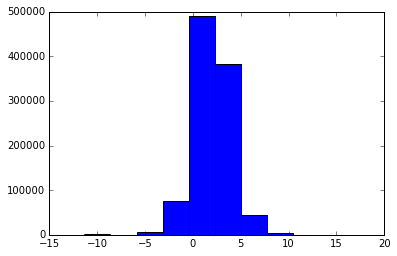

Función Normalizada junto con la función de densidad logística.


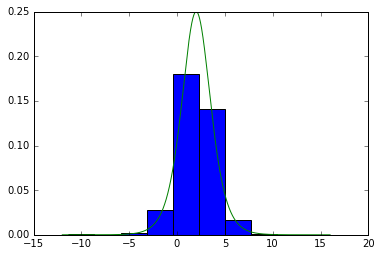

In [231]:
funInverLog(aleaN(1000000),2,1)

<h2> Función de Distribución Weibull </h2>

Función de Densidad:

\begin{equation*}
f(x;\lambda,k) = P(x;\lambda,k) = \left \{ \begin{matrix} \frac{k}{\lambda} (\frac{x}{\lambda})^{k-1} e^{-(x/\lambda)^k} & \mbox{para } x \geq \mbox{0} \\ 0 & \mbox{ en caso contrario} \end{matrix} \right.\end{equation*}


Donde $\lambda > 0$ es $\Re$ (Real) y $k > 0$ es $\Re$ (Real).

Función de Distribución Acumulada:

\begin{equation*}
F(x;\lambda,k) = P(X \leq x;\lambda,s) = 1-e^{-(x/\lambda)^k}.  
\end{equation*}

Para $x \geq 0$, siendo nula cuando $x < 0$.
Donde $\lambda > 0$ es $\Re$ (Real) y $k > 0$ es $\Re$ (Real).

Función de Distribución Acumulada Inversa:

\begin{equation*}
F^{-1}(p;\lambda,k) = \lambda(-\ln(1-p))^{1/k}.
\end{equation*}

Para $0 \leq p < 1$.

In [5]:
def funInverWei(u,y,k):
    x = []
    wei = []
    weix = []
    n = len(u)
    for i in range(0,n):
        x.append(y*(-np.log(1-u[i]))**(1/k))   #Acá va la función inversa.
    maxX = max(x)
    weix = np.arange(0,maxX,maxX/float(10000)) 
    for j in weix:
        wei.append((k/y)*((j/y)**(k-1))*(np.exp(-((j/y)**k))))
    
    print "Función Sin Normalizar."
    plt.hist(x)
    plt.show() 
    
    print "Función Normalizada junto con la función de densidad Weibull."
    plt.hist(x, normed = True)
    plt.plot(weix,wei)
    plt.show()

Función Sin Normalizar.


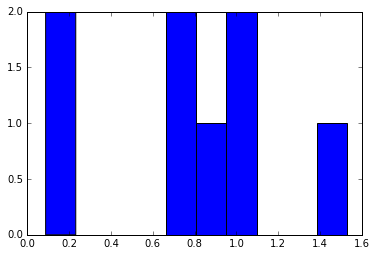

Función Normalizada junto con la función de densidad Weibull.


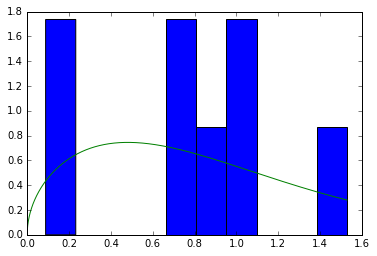

In [6]:
#funInverWei(aleaN(1000000),1,1.5)
funInverWei([0.4280, 0.5609, 0.0258, 0.6531, 0.8487, 0.0332, 0.6790, 0.4391],1,1.5)